# SoP Roads to Intersections
The purpose of this notebook is to aggregate the SoP variables (and Lion derived control variables) to the intersection

In [1]:
import pandas as pd
import geopandas as gp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
[x+'_norm' for x in ['FORM3', 'DENS2',
       'CONN5', 'PROX3', 'PARKS2', 'PAF2', 'PEDS3', 'TRAFFIC5', 'AESTTOT3',
       'SAFE', 'SoPIndex6']]

['FORM3_norm',
 'DENS2_norm',
 'CONN5_norm',
 'PROX3_norm',
 'PARKS2_norm',
 'PAF2_norm',
 'PEDS3_norm',
 'TRAFFIC5_norm',
 'AESTTOT3_norm',
 'SAFE_norm',
 'SoPIndex6_norm']

In [45]:
usecols = ['id', 'FORM3', 'DENS2',
       'CONN5', 'PROX3', 'PARKS2', 'PAF2', 'PEDS3', 'TRAFFIC5', 'AESTTOT3',
       'SAFE', 'SoPIndex6','FORM3_norm',
         'DENS2_norm',
         'CONN5_norm',
         'PROX3_norm',
         'PARKS2_norm',
         'PAF2_norm',
         'PEDS3_norm',
         'TRAFFIC5_norm',
         'AESTTOT3_norm',
         'SAFE_norm',
         'SoPIndex6_norm']

sop = pd.read_csv('../../dataJoin/joined_road_segments/joined_final_predicted_sop.csv', usecols=usecols)
sop.head()

,id,FORM3,DENS2,CONN5,PROX3,PARKS2,PAF2,PEDS3,TRAFFIC5,AESTTOT3,...,DENS2_norm,PROX3_norm,CONN5_norm,PARKS2_norm,PEDS3_norm,SAFE_norm,TRAFFIC5_norm,AESTTOT3_norm,PAF2_norm,SoPIndex6_norm
0,1,-7.809492,1.312970,-0.931710,-0.684070,-1.395603,-0.458275,8.864521,7.233681,5.201257,...,56.717218,5.721076,53.962696,0.143733,26.809494,65.489211,63.564348,36.207664,0.005288,37.477679
1,2,-7.809492,1.726369,-0.931710,-0.684070,-1.395603,-0.458275,21.181026,7.233681,8.736648,...,59.223003,5.721076,53.962696,0.143733,39.666604,80.558026,63.564348,39.767925,0.005288,45.933623
2,3,-7.809492,2.921196,-1.181347,0.860775,-1.395603,-0.458275,-0.449080,7.697672,8.530179,...,66.465350,7.479416,53.268287,0.143733,17.087095,65.489211,64.483592,39.560004,0.005288,36.514180
3,4,-7.809492,1.212505,-1.181347,0.860775,-1.395603,-0.458275,-0.449080,7.697672,5.498824,...,56.108261,7.479416,53.268287,0.143733,17.087095,80.558026,64.483592,36.507324,0.005288,37.237354
4,5,0.959903,3.857227,-0.931710,-0.626972,-1.395603,-0.458275,1.397577,7.233681,-0.154980,...,72.139030,5.786065,53.962696,0.143733,19.014806,91.887175,63.564348,30.813748,0.005288,41.266752


In [46]:
intersections = gp.GeoDataFrame.from_file('./intersections_final/intersections_final/intersections_final.shp')
segs = gp.GeoDataFrame.from_file('./osm_w_collisions/edges/edges.shp')
segs.rename(columns={'MAX_Number': 'Num_Lanes',
                     'MAX_Numb_1': 'Num_Park_Lanes',
                     'MAX_Numb_2': 'Num_Lanes_Total', 
                     'FIRST_Bike': 'Bike_Lanes',
                     'MAX_POSTED': 'Speed_Limit', 
                     'MAX_Street': "Street_Width",
                        }, inplace=True)
segs = segs.merge(sop, on='id', how='left')
segs.head()

,access,bridge,from,highway,junction,key,lanes,length,maxspeed,name,...,DENS2_norm,PROX3_norm,CONN5_norm,PARKS2_norm,PEDS3_norm,SAFE_norm,TRAFFIC5_norm,AESTTOT3_norm,PAF2_norm,SoPIndex6_norm
0,None,None,42817478,residential,None,0,None,81.315,20 mph,47th Avenue,...,56.717218,5.721076,53.962696,0.143733,26.809494,65.489211,63.564348,36.207664,0.005288,37.477679
1,None,None,42860543,residential,None,0,None,114.648,20 mph,47th Avenue,...,59.223003,5.721076,53.962696,0.143733,39.666604,80.558026,63.564348,39.767925,0.005288,45.933623
2,None,None,42872051,residential,None,0,None,161.961,None,27th Street,...,66.465350,7.479416,53.268287,0.143733,17.087095,65.489211,64.483592,39.560004,0.005288,36.514180
3,None,None,42872047,residential,None,0,None,87.217,None,27th Street,...,56.108261,7.479416,53.268287,0.143733,17.087095,80.558026,64.483592,36.507324,0.005288,37.237354
4,None,None,42510401,residential,None,0,None,170.68,None,Schenectady Avenue,...,72.139030,5.786065,53.962696,0.143733,19.014806,91.887175,63.564348,30.813748,0.005288,41.266752


In [47]:
for field in ['Num_Lanes', 'Num_Park_Lanes', 'Speed_Limit', 'Bike_Lanes', 'key']:
    segs[field] = segs[field].fillna(0) 
    segs[field] = segs[field].astype(int)    

In [30]:
agg_map = {
    'key': 'count',
    'Num_Lanes': 'mean',
    'Num_Park_Lanes': 'mean', 
    'Speed_Limit': 'mean', 
    'Bike_Lanes': 'max', 
    'Street_Width': 'mean',    
    'FORM3': 'mean', 
    'DENS2': 'mean',
    'CONN5': 'mean',
    'PROX3': 'mean',
    'PARKS2': 'mean',
    'PAF2': 'mean',
    'PEDS3': 'mean',
    'TRAFFIC5': 'mean',
    'AESTTOT3': 'mean',
    'SAFE': 'mean',
    'SoPIndex6': 'mean',    
    'FORM3_norm': 'mean', 
    'DENS2_norm': 'mean',
    'CONN5_norm': 'mean',
    'PROX3_norm': 'mean',
    'PARKS2_norm': 'mean',
    'PAF2_norm': 'mean',
    'PEDS3_norm': 'mean',
    'TRAFFIC5_norm': 'mean',
    'AESTTOT3_norm': 'mean',
    'SAFE_norm': 'mean',
    'SoPIndex6_norm': 'mean'
}

to_sum = segs.groupby('to').agg(agg_map)
to_sum.rename(columns={'key':'counts'}, inplace=True)

from_sum = segs.groupby('from').agg(agg_map)
from_sum.rename(columns={'key':'counts'}, inplace=True)

node_sum = from_sum.merge(to_sum, left_index=True, right_index=True, how='outer', suffixes=['_from','_to'])
node_sum.head()

,counts_from,Num_Lanes_from,Num_Park_Lanes_from,Speed_Limit_from,Bike_Lanes_from,Street_Width_from,FORM3_from,DENS2_from,CONN5_from,PROX3_from,...,DENS2_norm_to,CONN5_norm_to,PROX3_norm_to,PARKS2_norm_to,PAF2_norm_to,PEDS3_norm_to,TRAFFIC5_norm_to,AESTTOT3_norm_to,SAFE_norm_to,SoPIndex6_norm_to
1000467239,2.0,3.000000,0.000000,35.000000,0.0,36.000000,-5.676970,-0.911737,0.428739,-1.914927,...,36.833498,53.615492,7.765794,16.458345,0.005288,17.706063,48.941110,38.486052,80.558026,41.108902
1000468482,3.0,3.333333,1.333333,36.666667,0.0,73.666667,2.251078,-1.119931,-0.024744,5.275820,...,55.426071,53.962696,7.479416,16.458345,0.005288,18.797020,50.003748,45.832810,80.558026,42.114915
1000468745,2.0,3.000000,0.000000,30.000000,0.0,37.500000,-3.544449,-2.923434,1.789189,-4.690629,...,31.038599,61.531346,1.160818,25.211711,0.005288,15.394194,61.767410,42.428760,91.887175,44.639856
1000468917,2.0,1.500000,0.000000,30.000000,0.0,24.500000,-3.544449,-2.923434,1.789189,-4.690629,...,35.990725,53.962696,10.498577,9.017515,0.005288,21.861049,50.003748,35.150538,75.066201,42.464665
100455216,1.0,2.000000,2.000000,25.000000,0.0,44.000000,-7.809492,5.786948,3.563479,-0.684070,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
node_sum.fillna(0, inplace=True)
# total streets per intersection
node_sum['Num_Streets'] = node_sum[['counts_from', 'counts_to']].apply(np.sum, axis=1)

for field in ['Num_Lanes', 'Num_Park_Lanes', 'Speed_Limit', 'Bike_Lanes', 'Street_Width',
       'FORM3', 'DENS2', 'CONN5', 'PROX3', 'PARKS2', 'PAF2', 'PEDS3',
       'TRAFFIC5', 'AESTTOT3', 'SAFE', 'SoPIndex6', 'FORM3_norm', 'DENS2_norm', 
       'CONN5_norm', 'PROX3_norm', 'PARKS2_norm', 'PAF2_norm', 'PEDS3_norm',
       'TRAFFIC5_norm', 'AESTTOT3_norm', 'SAFE_norm', 'SoPIndex6_norm']:
    
    field_from = field + '_from'
    field_to = field + '_to'
    # weighted average (by count of streets per to/from grouping)
    node_sum[field] = node_sum.apply(lambda x: (x.counts_from*x[field_from]+x.counts_to * x[field_to])/x.Num_Streets, axis=1)

In [32]:
# node_sum = node_sum.reset_index().rename(columns={'index': 'osmid'})

In [33]:
fields = ['Num_Streets', 'Num_Lanes', 'Num_Park_Lanes', 'Speed_Limit', 'Bike_Lanes',
       'Street_Width', 'FORM3', 'DENS2', 'CONN5', 'PROX3', 'PARKS2', 'PAF2',
       'PEDS3', 'TRAFFIC5', 'AESTTOT3', 'SAFE','SoPIndex6', 'FORM3_norm', 'DENS2_norm', 
       'CONN5_norm', 'PROX3_norm', 'PARKS2_norm', 'PAF2_norm', 'PEDS3_norm',
       'TRAFFIC5_norm', 'AESTTOT3_norm', 'SAFE_norm', 'SoPIndex6_norm']

node_sum[fields].head()

,Num_Streets,Num_Lanes,Num_Park_Lanes,Speed_Limit,Bike_Lanes,Street_Width,FORM3,DENS2,CONN5,PROX3,...,DENS2_norm,CONN5_norm,PROX3_norm,PARKS2_norm,PAF2_norm,PEDS3_norm,TRAFFIC5_norm,AESTTOT3_norm,SAFE_norm,SoPIndex6_norm
1000467239,4.0,2.250000,0.0,26.250000,0.0,31.000000,-2.200867,-1.439571,-0.313895,-0.401273,...,40.032916,55.681256,6.042956,16.458345,0.005288,14.268244,47.112284,41.308418,80.558026,39.219267
1000468482,4.0,3.000000,1.0,36.250000,0.0,62.250000,-0.264064,-0.564959,-0.251485,4.172059,...,45.334306,55.854858,11.248315,6.440831,0.005288,16.122599,51.033753,34.238217,79.185070,38.381428
1000468745,3.0,2.666667,0.0,31.666667,0.0,33.333333,-3.544449,-2.923434,1.789189,-4.690629,...,31.038599,61.531346,1.160818,13.937929,0.005288,14.223106,47.631248,38.515514,84.334409,36.510044
1000468917,3.0,1.666667,0.0,31.666667,0.0,24.666667,0.354851,-2.651103,0.882223,-1.955968,...,32.689308,59.008463,4.273404,19.813645,0.005288,17.549812,57.846189,40.002686,86.280183,43.914792
100455216,1.0,2.000000,2.0,25.000000,0.0,44.000000,-7.809492,5.786948,3.563479,-0.684070,...,83.835877,66.466841,5.721076,0.143733,0.005288,14.868737,63.564348,35.150538,80.558026,38.650266


In [34]:
intersections_final = intersections.merge(node_sum[fields], left_on='osmid', right_index=True, how='left')

### Visualize merged Dataset

In [2]:
intersections_final = gp.GeoDataFrame.from_file('./intersections_final_w_sop/intersections_final.shp')
intersections_final.head()

,osmid,Total_Inju,Total_Fata,sub_dist,med_inc,norm_res_p,norm_work_,Num_Street,Num_Lanes,Num_Park_L,...,PARKS2_nor,PAF2_norm,PEDS3_norm,TRAFFIC5_n,AESTTOT3_n,SAFE_norm,SoPIndex6_,Collisions,Collision_,geometry
0,42860546,0.0,0.0,1.371429,13.714700,18.525176,0.382706,4.0,1.5,2.0,...,0.143733,0.005288,25.162572,64.023970,38.010729,73.023619,39.290709,0.0,0,POINT (1000750.795416632 210205.7528114537)
1,42467330,2.0,0.0,4.582604,4.004433,48.649265,1.256099,4.0,2.0,2.0,...,0.143733,0.005288,20.480076,63.564348,33.826127,91.887175,40.444334,2.0,1,POINT (1002652.742108569 177974.3482433519)
2,42467331,1.0,0.0,4.416357,3.880400,57.305828,1.048126,4.0,1.5,2.0,...,0.143733,0.005288,20.480076,64.023970,34.830253,88.668309,39.098959,1.0,1,POINT (1002921.868557178 177996.4131735155)
3,42467333,1.0,0.0,4.247996,5.534925,68.654563,1.268928,4.0,1.5,2.0,...,0.143733,0.005288,19.991653,64.023970,34.830253,89.054888,40.131205,1.0,1,POINT (1003181.00656743 178017.3803186663)
4,42467334,23.0,0.0,4.077225,6.210467,63.780911,1.550502,4.0,3.0,2.0,...,0.143733,0.005288,22.204565,66.112289,34.769547,77.599332,45.329821,23.0,1,POINT (1003459.565062104 178040.5515355509)


In [3]:
intersections_final.columns

Index(['osmid', 'Total_Inju', 'Total_Fata', 'sub_dist', 'med_inc',
       'norm_res_p', 'norm_work_', 'Num_Street', 'Num_Lanes', 'Num_Park_L',
       'Speed_Limi', 'Bike_Lanes', 'Street_Wid', 'FORM3', 'DENS2', 'CONN5',
       'PROX3', 'PARKS2', 'PAF2', 'PEDS3', 'TRAFFIC5', 'AESTTOT3', 'SAFE',
       'SoPIndex6', 'FORM3_norm', 'DENS2_norm', 'CONN5_norm', 'PROX3_norm',
       'PARKS2_nor', 'PAF2_norm', 'PEDS3_norm', 'TRAFFIC5_n', 'AESTTOT3_n',
       'SAFE_norm', 'SoPIndex6_', 'Collisions', 'Collision_', 'geometry'],
      dtype='object')

C:\Users\cyrus\Anaconda3\lib\site-packages\mapclassify\classifiers.py:96: UserWarning: Warning: setting k to 6
  Warn('Warning: setting k to %d' % k_q, UserWarning)
C:\Users\cyrus\Anaconda3\lib\site-packages\mapclassify\classifiers.py:96: UserWarning: Warning: setting k to 2
  Warn('Warning: setting k to %d' % k_q, UserWarning)


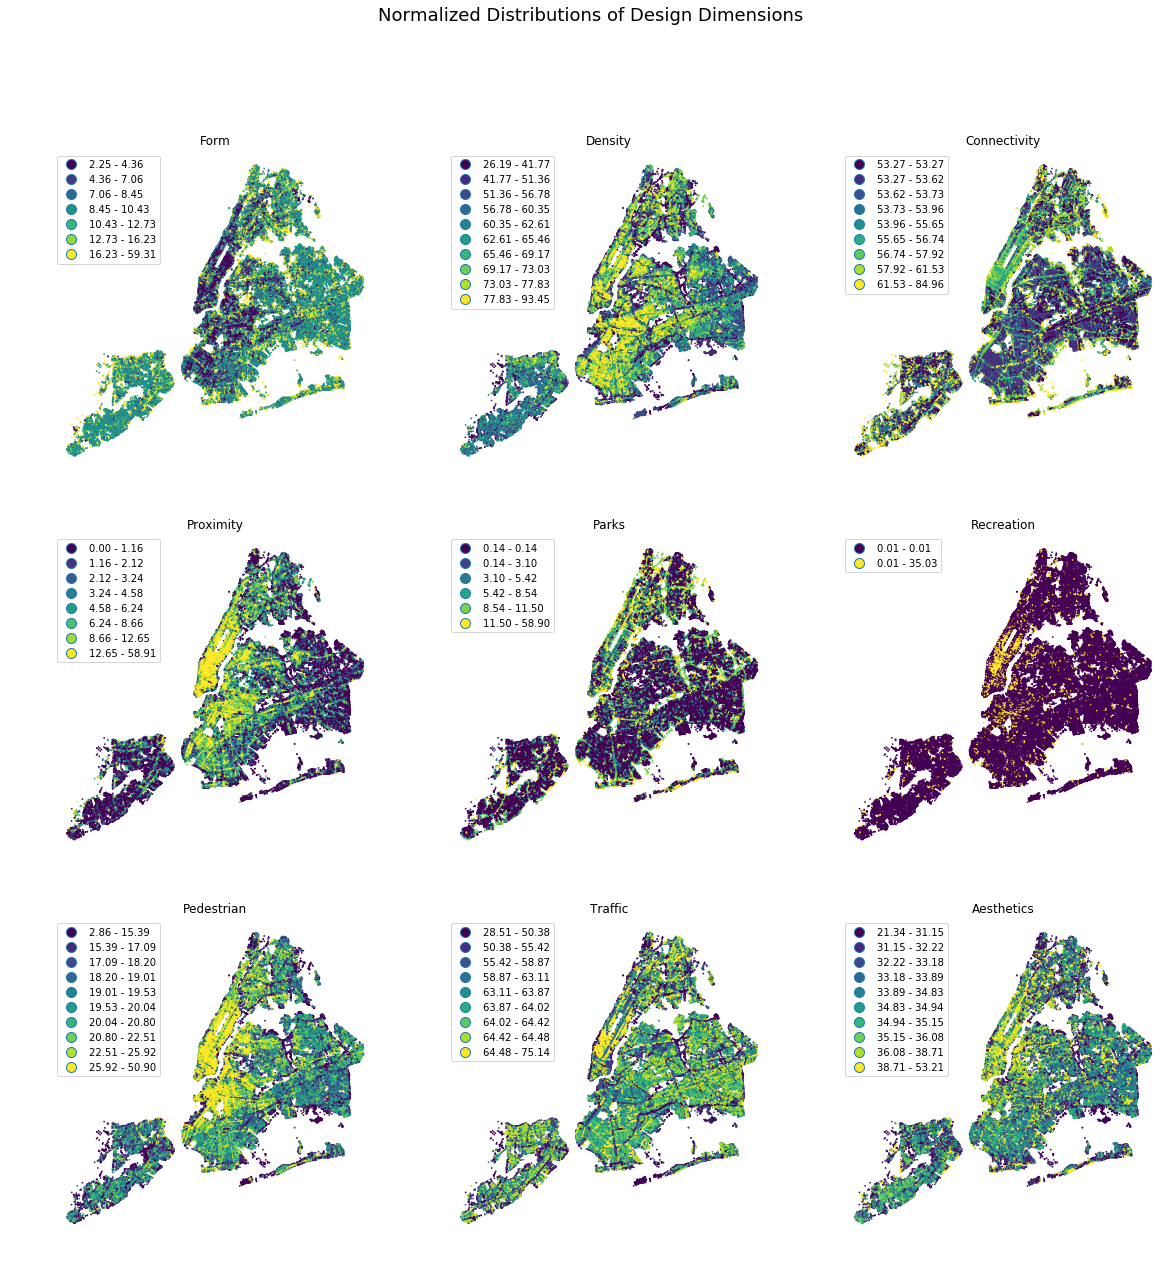

In [6]:
plt.figure(figsize=(20, 20))
n = 330
names = ['Form', 'Density', 'Connectivity', 'Proximity', 'Parks', 'Recreation', 'Pedestrian', 'Traffic', 'Aesthetics']
plt.suptitle('Normalized Distributions of Design Dimensions', fontsize=18)

for i, field in enumerate(['FORM3_norm', 'DENS2_norm', 'CONN5_norm', 'PROX3_norm', 'PARKS2_nor', 'PAF2_norm',
       'PEDS3_norm', 'TRAFFIC5_n', 'AESTTOT3_n']):
    n += 1
    ax = plt.subplot(n)
    ax.set_title(names[i])
    intersections_final.plot(column=field, k=10, scheme='Quantiles', ax=ax, markersize=0.5, legend=True) 
    ax.axis('off')
    
plt.savefig('../../../Plots/SoP_Variable_Maps.png')
plt.show()

(905558.2156913845, 1074954.1508979222, 113397.25394300566, 279284.4934044458)

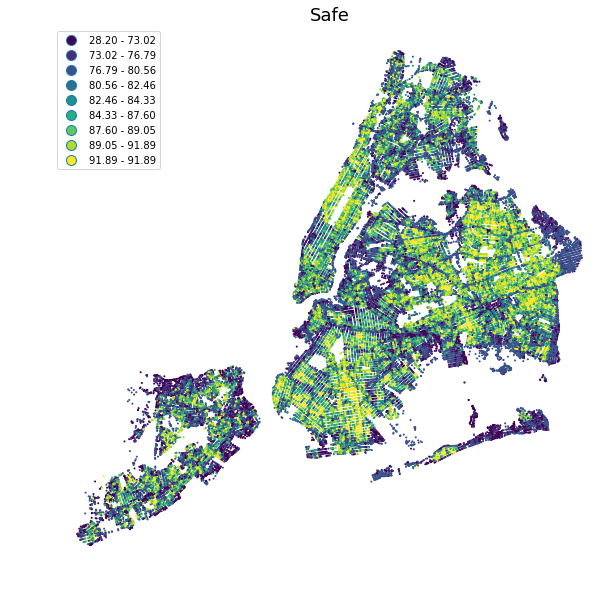

In [8]:
# Plot remaining variable - Safety
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title('Safe', fontsize=18)
intersections_final.plot(column='SAFE_norm', k=10, scheme='Quantiles', ax=ax, markersize=1, legend=True)
ax.axis('off')

### Visualize differences between intersections (where collisions did/did not occur)

In [37]:
intersections_final['Collisions'] = intersections_final[['Total_Inju', 'Total_Fata']].apply(np.sum, axis=1)
intersections_final['Collision_Occured'] = intersections_final.Collisions.apply(lambda x: 1 if x>0 else 0)
intersections_final.head()

,osmid,Total_Inju,Total_Fata,sub_dist,res_pop,med_inc,work_pop,norm_res_p,norm_work_,geometry,...,PROX3_norm,PARKS2_norm,PAF2_norm,PEDS3_norm,TRAFFIC5_norm,AESTTOT3_norm,SAFE_norm,SoPIndex6_norm,Collisions,Collision_Occured
0,42860546,0.0,0.0,1371.429138,7575.000000,137147.000000,156.489796,0.006645,0.000137,POINT (1000750.795416632 210205.7528114537),...,6.600246,0.143733,0.005288,25.162572,64.023970,38.010729,73.023619,39.290709,0.0,0
1,42467330,2.0,0.0,4582.604445,1026.000000,40044.333333,29.166667,0.017451,0.000451,POINT (1002652.742108569 177974.3482433519),...,3.457195,0.143733,0.005288,20.480076,63.564348,33.826127,91.887175,40.444334,2.0,1
2,42467331,1.0,0.0,4416.357204,1088.500000,38804.000000,23.500000,0.020556,0.000376,POINT (1002921.868557178 177996.4131735155),...,1.526952,0.143733,0.005288,20.480076,64.023970,34.830253,88.668309,39.098959,1.0,1
3,42467333,1.0,0.0,4247.996054,1180.250000,55349.250000,22.625000,0.024626,0.000455,POINT (1003181.00656743 178017.3803186663),...,3.946524,0.143733,0.005288,19.991653,64.023970,34.830253,89.054888,40.131205,1.0,1
4,42467334,23.0,0.0,4077.224853,1148.333333,62104.666667,28.000000,0.022878,0.000556,POINT (1003459.565062104 178040.5515355509),...,15.585632,0.143733,0.005288,22.204565,66.112289,34.769547,77.599332,45.329821,23.0,1


In [38]:
intersections_final.Collisions.max()

81.0

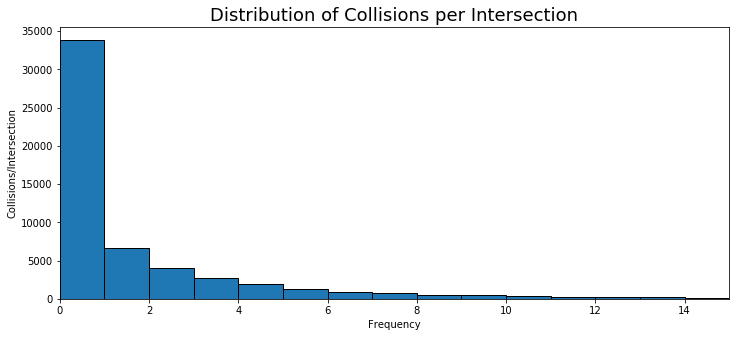

In [39]:
plt.figure(figsize=(12,5))
plt.title('Distribution of Collisions per Intersection', fontsize=18)
plt.xlabel('Frequency')
plt.ylabel('Collisions/Intersection')
plt.xlim(0,15)
plt.hist(intersections_final.Collisions, edgecolor='k', bins=81)
plt.savefig('../../../Collision_Distribution.png')
plt.show()

In [119]:
from sklearn.preprocessing import StandardScaler

In [117]:
# # normed
# intersections_final.iloc[:,-13:-2].head()

# unnormed
intersections_final.iloc[:,-24:-13].head()

,FORM3,DENS2,CONN5,PROX3,PARKS2,PAF2,PEDS3,TRAFFIC5,AESTTOT3,SAFE,SoPIndex6
0,-8.510518,1.793260,-1.056529,0.088352,-1.395603,-0.458275,4.650061,5.974009,6.991727,-6.980700,1.095783
1,-4.451408,3.718840,-0.931710,-2.673075,0.525345,-0.458275,2.295024,5.632297,2.836356,1.412148,7.905541
2,-4.720842,2.147821,-1.056529,-4.368950,0.525345,-0.458275,2.295024,5.974009,3.833468,-0.020003,4.151069
3,-4.720842,3.121916,-1.056529,-2.243159,0.525345,-0.458275,1.822259,5.974009,3.833468,0.151996,6.950188
4,0.499513,3.611247,0.165412,7.982746,0.525345,-0.458275,4.597621,5.733299,3.773186,-4.944856,21.485240


In [120]:
# unnormalized
scaler = StandardScaler()
X = scaler.fit_transform(intersections_final.iloc[:,-24:-13])
X = pd.DataFrame(X, columns=intersections_final.iloc[:,-24:-13].columns)
X.head()

,FORM3,DENS2,CONN5,PROX3,PARKS2,PAF2,PEDS3,TRAFFIC5,AESTTOT3,SAFE,SoPIndex6
0,-1.662491,-0.144620,-0.623301,0.213502,-1.144677,-0.62559,0.646229,0.604264,0.518648,-1.305910,-0.535595
1,0.063953,0.735327,-0.535391,-0.328449,-0.775043,-0.62559,0.136031,0.517045,-0.446577,1.301214,-0.069507
2,-0.050644,0.017406,-0.623301,-0.661277,-0.775043,-0.62559,0.136031,0.604264,-0.214964,0.856336,-0.326479
3,-0.050644,0.462546,-0.623301,-0.244075,-0.775043,-0.62559,0.033611,0.604264,-0.214964,0.909765,-0.134895
4,2.169708,0.686160,0.237313,1.762834,-0.775043,-0.62559,0.634868,0.542825,-0.228966,-0.673503,0.859945


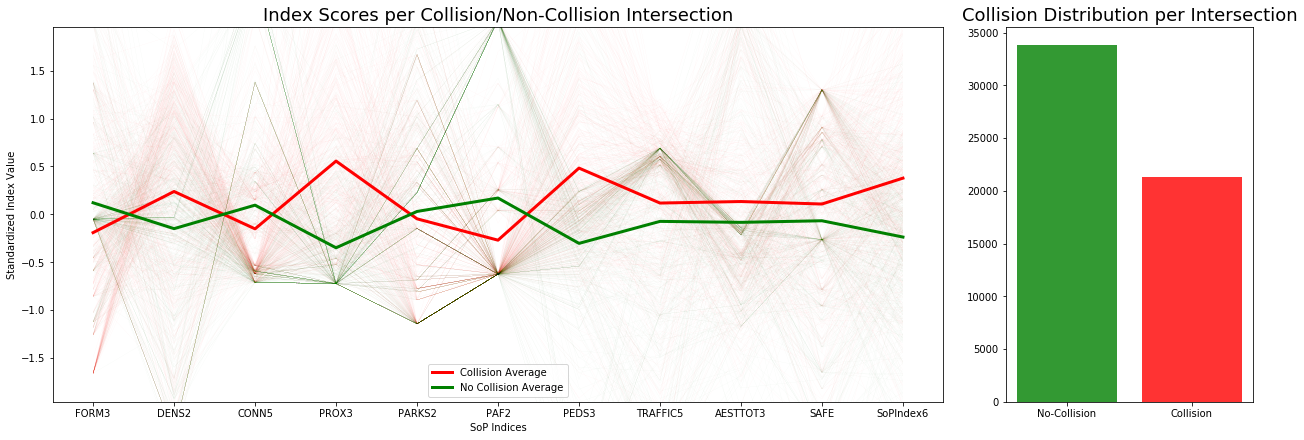

In [121]:
fig = plt.figure(constrained_layout=True, figsize=(18,6))
gs = fig.add_gridspec(1,3)

# plot SoP scores
ax = fig.add_subplot(gs[:2])
ax.set_ylim(-1.96,1.96)
ax.set_title('Index Scores per Collision/Non-Collision Intersection', fontsize=18)
ax.set_ylabel('Standardized Index Value')
ax.set_xlabel('SoP Indices')

# plot sample
ax.plot(X[intersections_final.Collision_Occured == 1].sample(500, axis=0, random_state=1992).T, 
        color='red', lw=0.1, alpha=0.1)
ax.plot(X[intersections_final.Collision_Occured == 0].sample(500, axis=0, random_state=1992).T, 
        color='green', lw=0.1, alpha=0.1)

#plot means
ax.plot(X[intersections_final.Collision_Occured == 1].mean(), 
        color='red', lw=3, zorder=2, label='Collision Average')
ax.plot(X[intersections_final.Collision_Occured == 0].mean(), 
        color='green', lw=3, zorder=2, label='No Collision Average')
plt.legend()

# Plot distribution
ax2 = fig.add_subplot(gs[2])
ax2.set_title('Collision Distribution per Intersection', fontsize=18)
ax2.bar(range(2), intersections_final.Collision_Occured.value_counts(), 
        color=['green','red'], alpha=0.8, tick_label=['No-Collision', 'Collision'])

plt.savefig('../../../Plots/SopIndex_Per_Intersection.png')
plt.show()

In [10]:
community_boards = gp.GeoDataFrame.from_file('../../Community_Boards/nycd_19b/nycd.shp')
intersections_joined = gp.sjoin(intersections_final, community_boards, how='left')
intersections_joined.head()

C:\Users\cyrus\Anaconda3\lib\site-packages\geopandas\tools\sjoin.py:44: UserWarning: CRS of frames being joined does not match!
  warn('CRS of frames being joined does not match!')


,osmid,Total_Inju,Total_Fata,sub_dist,res_pop,med_inc,work_pop,norm_res_p,norm_work_,geometry,...,PARKS2,PAF2,PEDS3,TRAFFIC5,AESTTOT3,SAFE,index_right,BoroCD,Shape_Leng,Shape_Area
0,42860546,0.0,0.0,1371.429138,7575.000000,137147.000000,156.489796,0.006645,0.000137,POINT (1000750.795416632 210205.7528114537),...,-1.395603,-0.458275,4.650061,5.974009,6.991727,-6.980700,68.0,402.0,71543.044665,1.398915e+08
1,42467330,2.0,0.0,4582.604445,1026.000000,40044.333333,29.166667,0.017451,0.000451,POINT (1002652.742108569 177974.3482433519),...,0.525345,-0.458275,2.295024,5.632297,2.836356,1.412148,8.0,317.0,43326.850619,9.381021e+07
2,42467331,1.0,0.0,4416.357204,1088.500000,38804.000000,23.500000,0.020556,0.000376,POINT (1002921.868557178 177996.4131735155),...,0.525345,-0.458275,2.295024,5.974009,3.833468,-0.020003,8.0,317.0,43326.850619,9.381021e+07
3,42467333,1.0,0.0,4247.996054,1180.250000,55349.250000,22.625000,0.024626,0.000455,POINT (1003181.00656743 178017.3803186663),...,0.525345,-0.458275,1.822259,5.974009,3.833468,0.151996,8.0,317.0,43326.850619,9.381021e+07
4,42467334,23.0,0.0,4077.224853,1148.333333,62104.666667,28.000000,0.022878,0.000556,POINT (1003459.565062104 178040.5515355509),...,0.525345,-0.458275,4.597621,5.733299,3.773186,-4.944856,8.0,317.0,43326.850619,9.381021e+07


In [11]:
intersections_joined['BoroCD'] = intersections_joined.BoroCD.fillna(0).astype(int)

In [359]:
communities = intersections_joined.groupby('BoroCD')[['sub_dist', 'res_pop', 'med_inc',
       'work_pop', 'norm_res_p', 'norm_work_', 'geometry', 'Num_Streets',
       'Num_Lanes', 'Num_Park_Lanes', 'Speed_Limit', 'Bike_Lanes',
       'Street_Width', 'FORM3', 'DENS2', 'CONN5', 'PROX3', 'PARKS2', 'PAF2',
       'PEDS3', 'TRAFFIC5', 'AESTTOT3', 'SAFE', 'Collision_Occured',
       'Collisions']].mean()
communities.head()

,sub_dist,res_pop,med_inc,work_pop,norm_res_p,norm_work_,Num_Streets,Num_Lanes,Num_Park_Lanes,Speed_Limit,...,CONN5,PROX3,PARKS2,PAF2,PEDS3,TRAFFIC5,AESTTOT3,SAFE,Collision_Occured,Collisions
BoroCD,,,,,,,,,,,,,,,,,,,,,
0,11465.927737,760.258326,47746.808601,46.135449,0.003727,0.000167,2.024390,0.739837,2.762195,27.987805,...,2.018946,-4.095856,3.077079,0.160084,-2.846790,-1.124452,0.770385,-5.351194,0.121951,0.195122
101,606.400633,2926.352586,170124.122163,1060.305389,0.022308,0.007721,3.425926,1.242681,3.189462,25.716711,...,-0.213828,8.366070,8.451749,0.327204,4.421673,2.454213,9.382408,-2.438778,0.679894,2.812169
102,675.094396,1396.465941,131105.568311,452.504646,0.024713,0.006921,3.700000,1.633826,3.552197,25.415530,...,-0.444798,9.437208,6.481229,0.596908,7.470660,3.798839,9.619492,-1.622084,0.743182,3.725000
103,1276.225804,1593.280647,49505.078089,180.150245,0.032718,0.004451,3.501149,1.588467,3.681686,25.751724,...,-0.121832,6.093863,9.656532,0.383083,8.391502,2.811490,8.548778,-1.928124,0.763218,5.002299
104,1485.116196,3125.825185,109903.977643,725.187830,0.019972,0.008238,3.671053,1.411568,4.276700,26.629660,...,0.584236,8.667487,5.129557,0.434642,7.796879,1.701189,6.158954,-4.230928,0.717105,6.095395


No handles with labels found to put in legend.


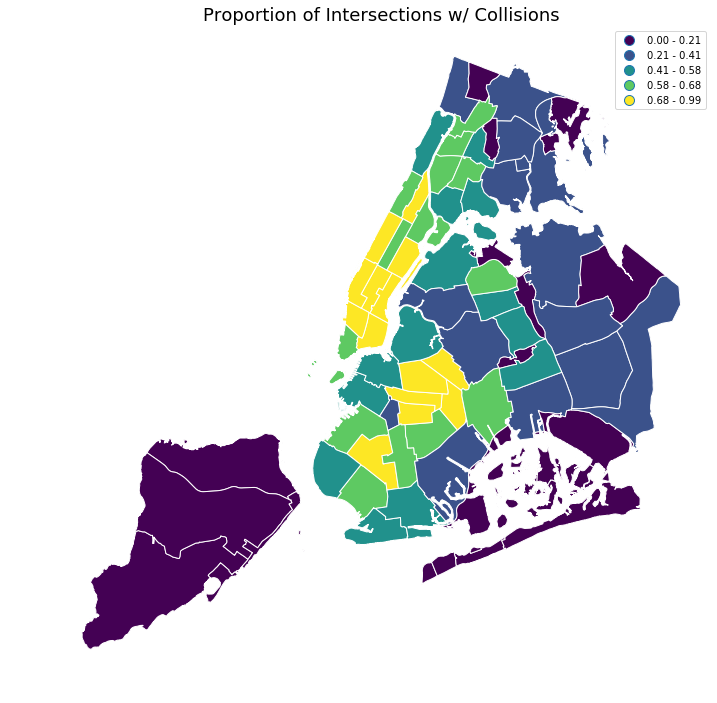

In [380]:
# community_boards = community_boards.merge(communities, left_on='BoroCD', right_index=True, how='left')

fig, ax = plt.subplots(figsize=(12,12))
ax.set_title('Proportion of Intersections w/ Collisions', fontsize=18)
ax.legend()
community_boards.plot(column='Collision_Occured', scheme='Quantiles', 
                      k=5, ax=ax, legend=True, edgecolor='white')
ax.axis('off')
plt.savefig('../../../Plots/CommunityBoardCollisions.png')

In [13]:
intersections_joined.to_file('../../Community_Boards/w_sop/intersections_final.shp')

In [382]:
community_boards.to_file('../../Community_Boards/w_sop/communities.shp')

### Nomalizing Final Intersection control variables so they're easier to explain

In [40]:
intersections_final.drop(columns=['work_pop', 'res_pop'], inplace=True)

# median income will be in units of $10,000
intersections_final['med_inc'] = intersections_final['med_inc']/10000

# subway distance will be in units of 1,000 ft
intersections_final['sub_dist'] = intersections_final['sub_dist']/1000

# normalized populations in 10,000 people per sq. mi.
intersections_final['norm_res_p'] = (intersections_final['norm_res_p']/3.58701e-8)/10000
intersections_final['norm_work_'] = (intersections_final['norm_work_']/3.58701e-8)/10000

In [41]:
intersections_final.head()

,osmid,Total_Inju,Total_Fata,sub_dist,med_inc,norm_res_p,norm_work_,geometry,Num_Streets,Num_Lanes,...,PROX3_norm,PARKS2_norm,PAF2_norm,PEDS3_norm,TRAFFIC5_norm,AESTTOT3_norm,SAFE_norm,SoPIndex6_norm,Collisions,Collision_Occured
0,42860546,0.0,0.0,1.371429,13.714700,18.525176,0.382706,POINT (1000750.795416632 210205.7528114537),4.0,1.5,...,6.600246,0.143733,0.005288,25.162572,64.023970,38.010729,73.023619,39.290709,0.0,0
1,42467330,2.0,0.0,4.582604,4.004433,48.649265,1.256099,POINT (1002652.742108569 177974.3482433519),4.0,2.0,...,3.457195,0.143733,0.005288,20.480076,63.564348,33.826127,91.887175,40.444334,2.0,1
2,42467331,1.0,0.0,4.416357,3.880400,57.305828,1.048126,POINT (1002921.868557178 177996.4131735155),4.0,1.5,...,1.526952,0.143733,0.005288,20.480076,64.023970,34.830253,88.668309,39.098959,1.0,1
3,42467333,1.0,0.0,4.247996,5.534925,68.654563,1.268928,POINT (1003181.00656743 178017.3803186663),4.0,1.5,...,3.946524,0.143733,0.005288,19.991653,64.023970,34.830253,89.054888,40.131205,1.0,1
4,42467334,23.0,0.0,4.077225,6.210467,63.780911,1.550502,POINT (1003459.565062104 178040.5515355509),4.0,3.0,...,15.585632,0.143733,0.005288,22.204565,66.112289,34.769547,77.599332,45.329821,23.0,1


In [42]:
intersections_final.to_file('./intersections_final_w_sop/intersections_final.shp')

In [43]:
intersections_final.to_csv('./intersections_final_w_sop/intersections_final.csv', index=False)